<a href="https://colab.research.google.com/github/rajsaumyaa/ML_labs/blob/main/exp5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn import naive_bayes
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier


In [2]:
features = ["Age", "workclass", "fnlwgt", "Education-Num", "MartialStatus", "Occupation", "Relationship", "Race", "Sex", "CapitalGain", "CapitalLoss", "Hoursperweek", "Country", "Target"]


In [3]:
data_train = pd.read_csv('adult.data', names = features)
data_train.head()

,Age,workclass,fnlwgt,Education-Num,MartialStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,Hoursperweek,Country,Target
39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
data_test = pd.read_csv('adult.test', names = features, skiprows=1)
data_test.head()

,Age,workclass,fnlwgt,Education-Num,MartialStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,Hoursperweek,Country,Target
25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [5]:
data_train.shape

(32561, 14)

In [6]:
data_test.shape

(16281, 14)

In [7]:
data_train.info()


<class 'pandas.core.frame.DataFrame'>
Index: 32561 entries, 39 to 52
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Age            32561 non-null  object
 1   workclass      32561 non-null  int64 
 2   fnlwgt         32561 non-null  object
 3   Education-Num  32561 non-null  int64 
 4   MartialStatus  32561 non-null  object
 5   Occupation     32561 non-null  object
 6   Relationship   32561 non-null  object
 7   Race           32561 non-null  object
 8   Sex            32561 non-null  object
 9   CapitalGain    32561 non-null  int64 
 10  CapitalLoss    32561 non-null  int64 
 11  Hoursperweek   32561 non-null  int64 
 12  Country        32561 non-null  object
 13  Target         32561 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.7+ MB


In [8]:

data_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16281 entries, 25 to 35
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Age            16281 non-null  object
 1   workclass      16281 non-null  int64 
 2   fnlwgt         16281 non-null  object
 3   Education-Num  16281 non-null  int64 
 4   MartialStatus  16281 non-null  object
 5   Occupation     16281 non-null  object
 6   Relationship   16281 non-null  object
 7   Race           16281 non-null  object
 8   Sex            16281 non-null  object
 9   CapitalGain    16281 non-null  int64 
 10  CapitalLoss    16281 non-null  int64 
 11  Hoursperweek   16281 non-null  int64 
 12  Country        16281 non-null  object
 13  Target         16281 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.9+ MB


In [9]:

data_train.isnull().sum()

,0
Age,0
workclass,0
fnlwgt,0
Education-Num,0
MartialStatus,0
Occupation,0
Relationship,0
Race,0
Sex,0
CapitalGain,0


In [10]:
data_test.isnull().sum()

,0
Age,0
workclass,0
fnlwgt,0
Education-Num,0
MartialStatus,0
Occupation,0
Relationship,0
Race,0
Sex,0
CapitalGain,0


In [11]:
le = LabelEncoder()

In [12]:
label = data_train.select_dtypes(include=['object']).columns
for i in label:
  data_train[i] = le.fit_transform(data_train[i].astype(str))

In [13]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32561 entries, 39 to 52
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Age            32561 non-null  int64
 1   workclass      32561 non-null  int64
 2   fnlwgt         32561 non-null  int64
 3   Education-Num  32561 non-null  int64
 4   MartialStatus  32561 non-null  int64
 5   Occupation     32561 non-null  int64
 6   Relationship   32561 non-null  int64
 7   Race           32561 non-null  int64
 8   Sex            32561 non-null  int64
 9   CapitalGain    32561 non-null  int64
 10  CapitalLoss    32561 non-null  int64
 11  Hoursperweek   32561 non-null  int64
 12  Country        32561 non-null  int64
 13  Target         32561 non-null  int64
dtypes: int64(14)
memory usage: 3.7 MB


In [14]:

data_train.isnull().sum()

,0
Age,0
workclass,0
fnlwgt,0
Education-Num,0
MartialStatus,0
Occupation,0
Relationship,0
Race,0
Sex,0
CapitalGain,0


In [15]:

label1 = data_test.select_dtypes(include=['object']).columns
for i in label1:
  data_test[i] = le.fit_transform(data_test[i].astype(str))

In [16]:
data_test.isnull().sum()


,0
Age,0
workclass,0
fnlwgt,0
Education-Num,0
MartialStatus,0
Occupation,0
Relationship,0
Race,0
Sex,0
CapitalGain,0


In [17]:
X_train = data_train.iloc[:,0:14]
Y_train = data_train.iloc[:, -1]

In [18]:
X_test = data_test.iloc[:,0:14]
Y_test = data_test.iloc[:, -1]

In [19]:
Naive_Bayes = naive_bayes.MultinomialNB()

In [20]:


Naive_Bayes.fit(X_train, Y_train)
y_pred = Naive_Bayes.predict(X_test)
Accuracy_of_Naive_Bayes = Naive_Bayes.score(X_test, Y_test)*100
print("Accuracy of Naive Bayes Model:" , Accuracy_of_Naive_Bayes)

Accuracy of Naive Bayes Model: 78.5148332412014


In [21]:
Recall_Score_of_Naive_Bayes = recall_score(Y_test, y_pred, average='micro')
print("Recall Score of Naive Bayes Model:" , Recall_Score_of_Naive_Bayes)

Recall Score of Naive Bayes Model: 0.785148332412014


In [22]:
Precision_Score_of_Naive_Bayes = precision_score(Y_test, y_pred, average = 'macro')*100
print("Precision Score of Naive Bayes Model:" , Precision_Score_of_Naive_Bayes)

Precision Score of Naive Bayes Model: 71.12835753567018


In [23]:
F1_Score_of_Naive_Bayes = f1_score(Y_test, y_pred , average= 'macro' ) *100
print("F1 Score of Naive Bayes Model:" , F1_Score_of_Naive_Bayes)

F1 Score of Naive Bayes Model: 60.44000575267169


In [24]:
KNN = KNeighborsClassifier(n_neighbors=5)

In [25]:
KNN.fit(X_train, Y_train)
y_pred = KNN.predict(X_test)

In [27]:
Accuracy_of_KNN = (accuracy_score(y_pred, Y_test))*100
print("Accuracy of KNN Model:" , Accuracy_of_KNN)

Accuracy of KNN Model: 77.83919906639642


In [28]:
Recall_Score_of_KNN = recall_score(Y_test, y_pred, average='macro')
print("Recall Score of KNN Model:" , Recall_Score_of_KNN)

Recall Score of KNN Model: 0.6175046905374405


In [29]:
Precision_Score_of_KNN = precision_score(Y_test, y_pred , average = 'macro')*100
print("Precision Score of KNN Model:" , Precision_Score_of_KNN)

Precision Score of KNN Model: 68.38107629945158


In [30]:
F1_Score_of_KNN = f1_score(Y_test, y_pred , average= 'macro' ) *100
print("F1 Score of KNN Model:" , F1_Score_of_KNN)

F1 Score of KNN Model: 63.19861970973308


In [31]:
print("Accuracy of KNN: ", Accuracy_of_KNN)
print("Accuracy of Naive Bayes: ", Accuracy_of_Naive_Bayes)

Accuracy of KNN:  77.83919906639642
Accuracy of Naive Bayes:  78.5148332412014


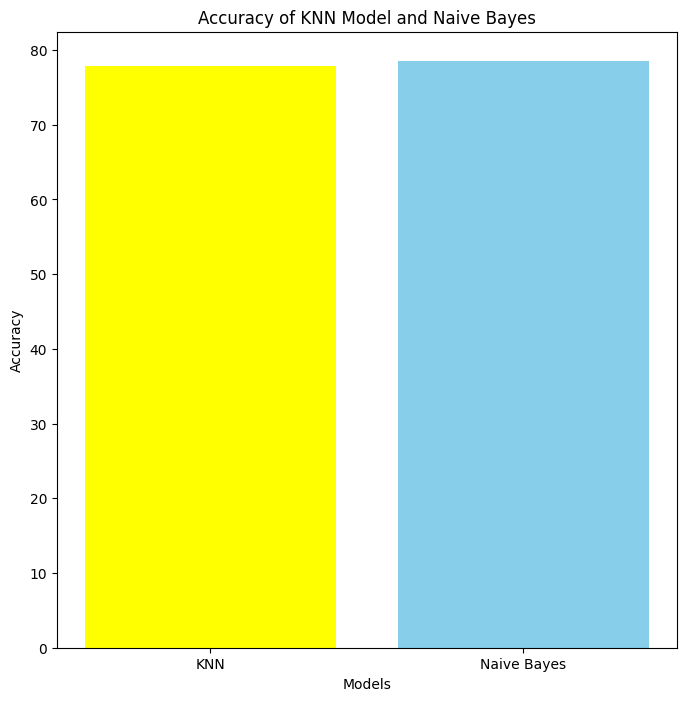

In [32]:
x = ['KNN', 'Naive Bayes']
y = [Accuracy_of_KNN, Accuracy_of_Naive_Bayes]
plt.figure(figsize = (8, 8))
plt.bar(x, y, color = ['yellow', 'skyblue'])
plt.xlabel('Models')
plt.ylabel("Accuracy")
plt.title("Accuracy of KNN Model and Naive Bayes")
plt.show()

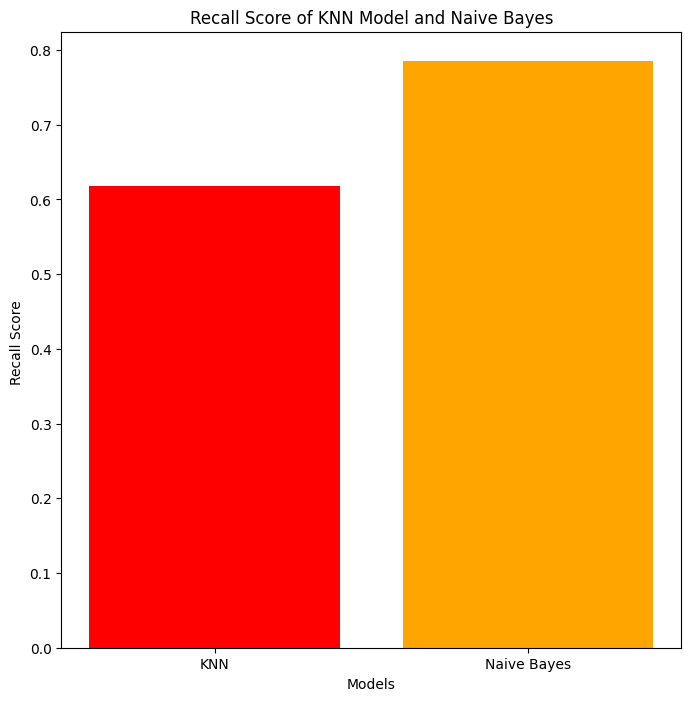

In [33]:
x = ['KNN', 'Naive Bayes']
y = [Recall_Score_of_KNN, Recall_Score_of_Naive_Bayes]
plt.figure(figsize = (8, 8))
plt.bar(x, y, color = ['red', 'orange'])
plt.xlabel('Models')
plt.ylabel("Recall Score ")
plt.title("Recall Score of KNN Model and Naive Bayes")
plt.show()

In [34]:
print("Precision Score of Naive Bayes Model: ", Precision_Score_of_Naive_Bayes)
print("Precision Score of KNN Model: ", Precision_Score_of_KNN)

Precision Score of Naive Bayes Model:  71.12835753567018
Precision Score of KNN Model:  68.38107629945158


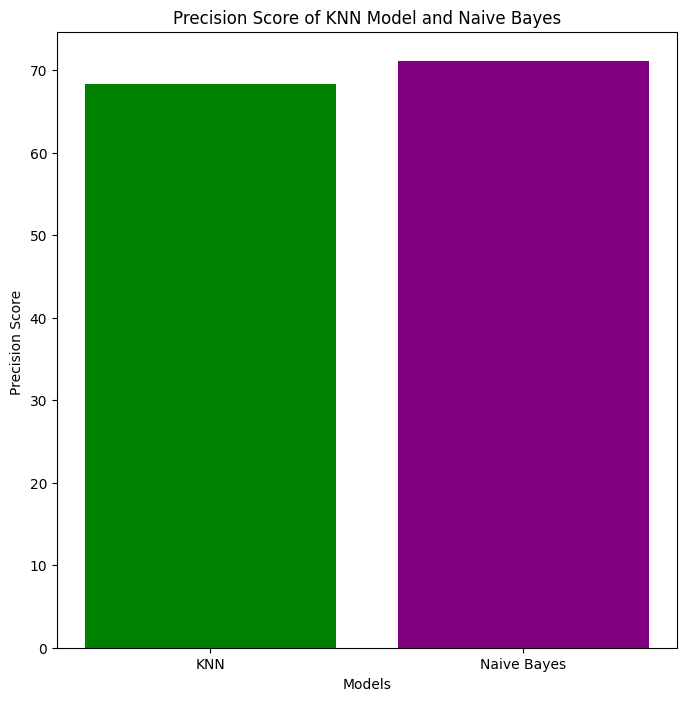

In [35]:
x = ['KNN', 'Naive Bayes']
y = [Precision_Score_of_KNN, Precision_Score_of_Naive_Bayes]
plt.figure(figsize = (8, 8))
plt.bar(x, y, color = ['green', 'purple'])
plt.xlabel('Models')
plt.ylabel("Precision Score ")
plt.title("Precision Score of KNN Model and Naive Bayes")
plt.show()

In [36]:
print("F1 Score od Naive Bayes Model: ", F1_Score_of_Naive_Bayes)
print("F1 Score of KNN Model: ", F1_Score_of_KNN)

F1 Score od Naive Bayes Model:  60.44000575267169
F1 Score of KNN Model:  63.19861970973308


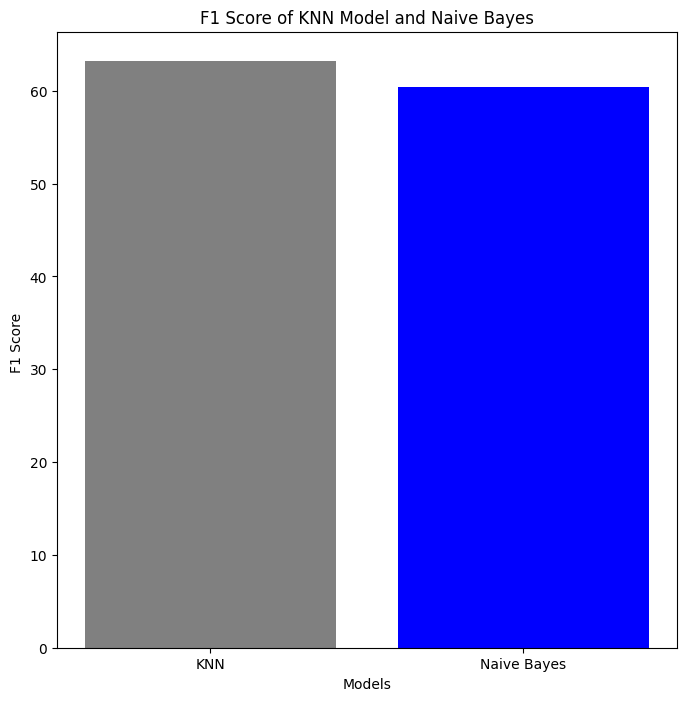

In [37]:
x = ['KNN', 'Naive Bayes']
y = [F1_Score_of_KNN, F1_Score_of_Naive_Bayes]
plt.figure(figsize = (8, 8))
plt.bar(x, y, color = ['grey', 'blue'])
plt.xlabel('Models')
plt.ylabel("F1 Score ")
plt.title("F1 Score of KNN Model and Naive Bayes")
plt.show()